<a href="https://colab.research.google.com/github/krispad/Hello_Kris/blob/master/yield_curve_kp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import sklearn as sk
import statsmodels as sm



In [ ]:
!pip install sktime
import sktime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 10_yr.csv to 10_yr.csv


In [5]:
tenyr_yield_curve_data = pd.read_csv("/content/10_yr.csv")

In [ ]:
tenyr_yield_curve_data.head()


,Date,10 Yr
0,1990-01-02,7.94
1,1990-01-03,7.99
2,1990-01-04,7.98
3,1990-01-05,7.99
4,1990-01-08,8.02


In [ ]:
tenyr_yield_curve_data.columns

Index(['Date', '10 Yr'], dtype='object')

In [6]:
lag_tenyr = tenyr_yield_curve_data['10 Yr'].diff()
tenyr_yield_curve_data['lag_tenyr'] = lag_tenyr

In [ ]:
tenyr_yield_curve_data.head()

,Date,10 Yr,lag_tenyr
0,1990-01-02,7.94,NaN
1,1990-01-03,7.99,0.05
2,1990-01-04,7.98,-0.01
3,1990-01-05,7.99,0.01
4,1990-01-08,8.02,0.03


In [12]:
a = tenyr_yield_curve_data['Date'] > '2020-12-31' # parses the date column
tenyr_yield_curve_data[a]['lag_tenyr'].head()

7756    0.00
7757    0.03
7758    0.08
7759    0.04
7760    0.05
Name: lag_tenyr, dtype: float64

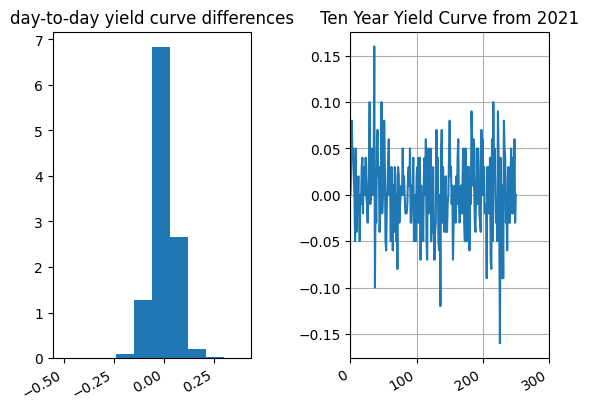

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, sharex = False, sharey = False)
fig.subplots_adjust(wspace = .5) # make vertical space between the plots
ax[0].hist(tenyr_yield_curve_data["lag_tenyr"][1:],
            density = True) # histogram of ten yr yields
ax[0].set_title("day-to-day yield curve differences")
# Info. for plot 2
for label in ax[1].get_yticklabels():
  label.set_visible(True)

ax[1].plot(np.arange(len(tenyr_yield_curve_data[a]["Date"])), tenyr_yield_curve_data[a]['lag_tenyr'])
ax[1].set_xlim(0, 300, auto = True)
ax[1].grid(True)
ax[1].set_title("Ten Year Yield Curve from 2021")
fig.autofmt_xdate()

In [ ]:
from sktime.param_est.stationarity import StationarityADF
sty_est = StationarityADF()
sty_est.fit(lag_tenyr[1:])


StationarityADF()

In [ ]:
sty_est.get_fitted_params()


{'pvalue': 0.0,
 'stationary': True,
 'test_statistic': -22.77385824102585,
 'used_lag': 13}